## SVR 이란
>시계열 데이터처럼 x에대하여 y를 찍을 때 그 선을 찾아내는 것.

>labpacian, Gaussian, Polynomial , epsilon-insesitive

> 다양한 커널이 있다
>    >커널을 사용하는 이유:
 <br>비선형 분류에 대해서 설명할 수 없을 때 설명력을 올려주기 위해 사용하는 것.</br>


In [21]:
from sklearn.svm import SVR
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import matplotlib as mpl
import numpy as np
boston = load_boston()
x,y = boston.data,boston.target

In [7]:
# 보통 값의 차이가 너무 심하기 때문에 
# regression은 왠만하면 scale을 해준다
# 결측치,이상치도 확인해야한다.
x = scale(x)
y = scale(y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
svr = SVR(kernel='rbf',gamma='auto')
svr.fit(x_train,y_train)

SVR(gamma='auto')

R-squared : 0.8939286449010634
CV mean score : 0.49117341234397804
MSE:  0.15747437725715135
range(0, 152)


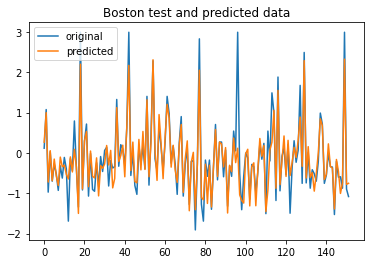

In [13]:
score = svr.score(x_train,y_train)
print(f'R-squared : {score}')
cv_score = cross_val_score(svr,x, y, cv=5)
print(f'CV mean score : {cv_score.mean()}')
y_pred = svr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("MSE: ",mse)

x_ax = range(len(y_test))
plt.plot(x_ax,y_test,label='original')
plt.plot(x_ax,y_pred,label='predicted')
plt.title("Boston test and predicted data")
plt.legend()
plt.show()


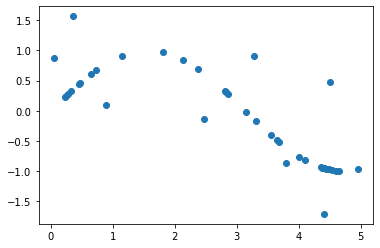

In [22]:
xdata = np.sort(5*np.random.rand(40,1),axis = 0)
ydata = np.sin(xdata).ravel()
ydata[::5] += 3 * (0.5 - np.random.rand(8))
plt.scatter(xdata,ydata,label='data')
clf_svr_linear = SVR(kernel = 'linear', C=1e3)
clf_svr_poly = SVR(kernel = 'poly', C=1e3, degree=2)
clf_svr_rbf = SVR(kernel='rbf', C=1e3, gamma = 0.1)
clf_svr_linear.fit(xdata,ydata)
clf_svr_poly.fit(xdata,ydata)
clf_svr_rbf.fit(xdata,ydata)
results_lin = clf_svr_linear.predict(xdata[:2])
results_poly = clf_svr_poly.predict(xdata[:2])
results_rbf = clf_svr_rbf.predict(xdata[:2])
results_lin = clf_svr_linear.predict(xdata)
results_poly = clf_svr_poly.predict(xdata)
results_rbf = clf_svr_rbf.predict(xdata)

mpl.rc('font', family = 'Malgun Gothic')
